In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv (r'..\train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [24]:
# Selecionar colunas numéricas para a clusterização
colunas = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'FullBath', 'TotRmsAbvGrd']

In [6]:
# Remover linhas com valores ausentes nas colunas selecionadas
df_limpo = df.dropna(subset=colunas)

In [25]:
# Extrair as colunas relevantes para a clusterização
X = df_limpo[colunas].values

In [26]:
# Padronizar os dados
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

In [27]:
# Criando o objeto do algoritmo de clusterização AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)

In [28]:
# Ajustando o modelo aos dados padronizados
agg_clustering.fit(X_padronizado)

AgglomerativeClustering(n_clusters=3)

In [29]:
# Obtendo as previsões dos clusters para cada amostra
df_limpo['cluster'] = agg_clustering.labels_

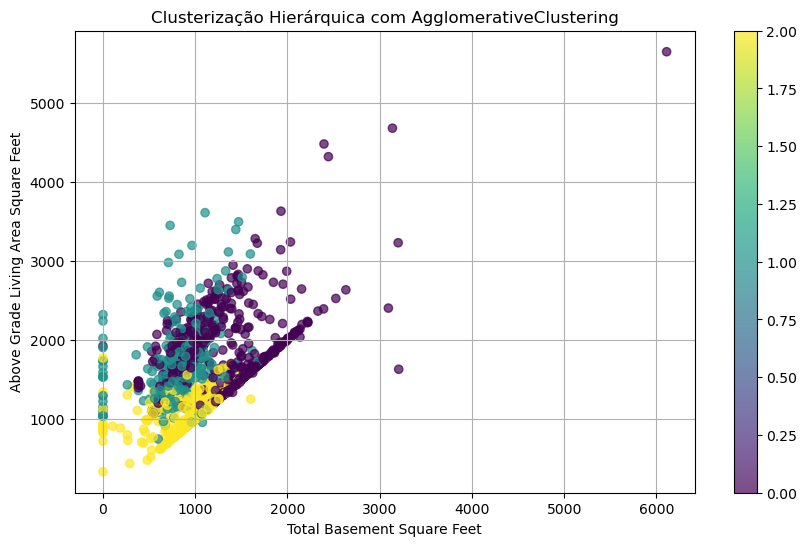

In [31]:
# Visualizar os clusters usando duas das features
plt.figure(figsize=(10, 6))
plt.scatter(df_limpo['TotalBsmtSF'], df_limpo['GrLivArea'], c=df_limpo['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('Clusterização Hierárquica com AgglomerativeClustering')
plt.xlabel('Total Basement Square Feet')
plt.ylabel('Above Grade Living Area Square Feet')
plt.grid(True)
plt.show()